In [6]:
pip install mglearn

  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ------------------------ -------------- 358.4/581.4 kB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 581.4/581.4 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

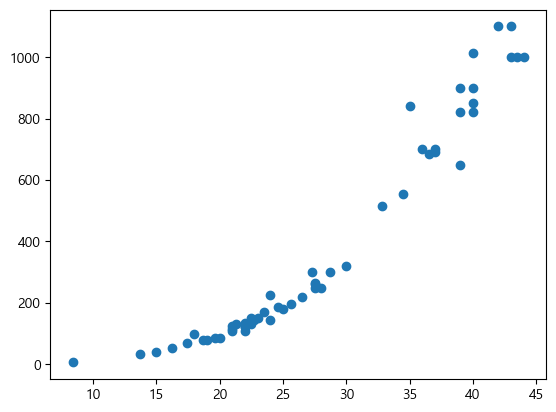

In [8]:
plt.scatter(perch_length , perch_weight)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(perch_length, perch_weight , random_state = 42)

In [19]:
print(x_train.shape , x_test.shape)

(42, 1) (14, 1)


In [18]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knr = KNeighborsRegressor()
knr.fit(x_train , y_train)

KNeighborsRegressor()

In [24]:
knr.score(x_train , y_train)

0.9698823289099254

In [25]:
knr.score(x_test , y_test)

0.992809406101064

 - Regressor로 만들어내는 score는 정확도가 아닌 결정계수이다.
 - 결정계수 : 1 - ((실제값 - 예측값)의 제곱합 / (실제값 - 평균)의 제곱합)

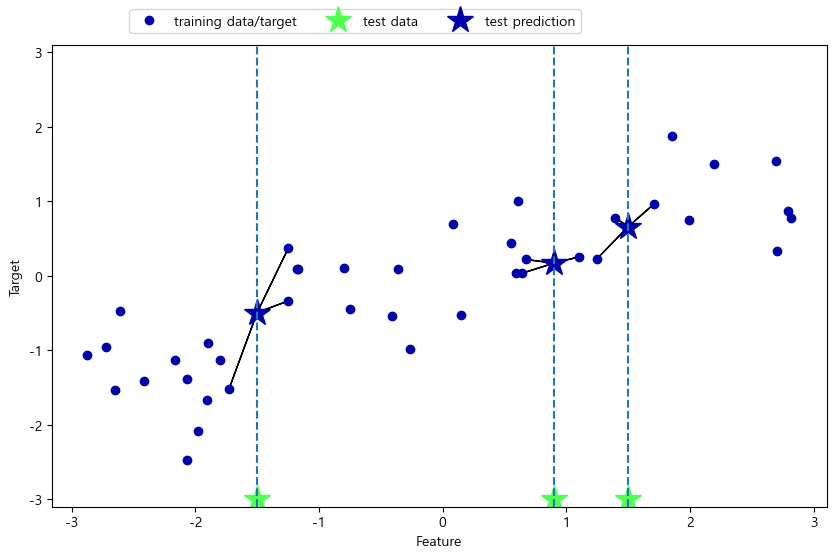

In [26]:
 mglearn.plots.plot_knn_regression(n_neighbors = 3)

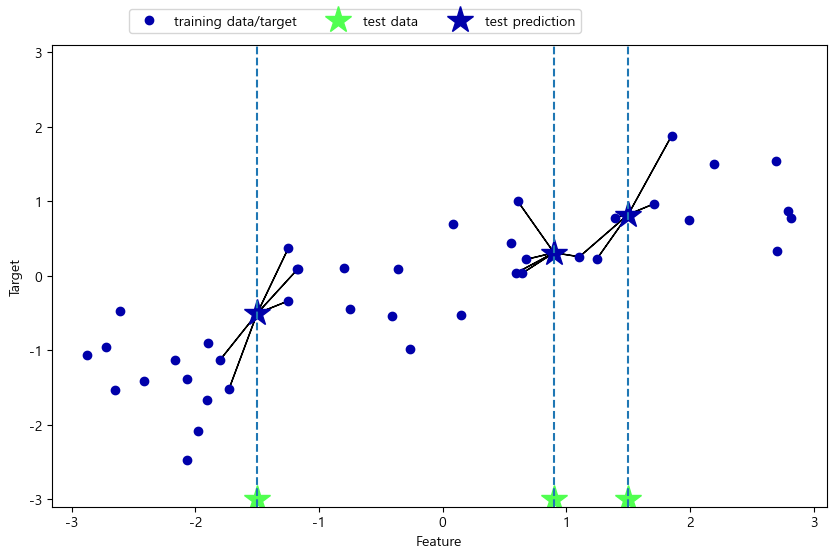

In [27]:
 mglearn.plots.plot_knn_regression(n_neighbors = 5)

In [30]:
test_predict = knr.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test , test_predict)

In [34]:
mae

19.157142857142862

- 과소적합 vs 과대적합
    - 과대적합 : 훈련 데이터의 성능이 월등히 뛰어남
    - 괴소적합 : 훈련 데이터와 테스트 데이터의 성능이 둘 다 좋지 않을 때 , 테스트 데이터의 성능이 월등히 뛰어남

In [35]:
knr.score(x_train , y_train)

0.9698823289099254

In [36]:
knr.score(x_test , y_test)

0.992809406101064

- 과소적합
    - 해결법 : 모델을 조금 더 복잡하게 만들기
    - knn에서는 모델을 복잡하게 만드는 방법 중 하나로 , 이웃 수를 줄인다.

In [37]:
#길이가 100인 생선의 무게를 예측

knr.predict([[100]])

array([1010.])

In [38]:
knr.predict([[1000]])

array([1010.])

- 한계 : 길이가 학습한 데이터 안에 존재하지 않으면 예측이 맞지 않는다.

In [42]:
from sklearn.model_selection import train_test_split
train_input , test_input , train_target , test_target = train_test_split(perch_length , perch_weight , random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(train_input , train_target)

KNeighborsRegressor()

In [52]:
knr.kneighbors([[50]])

(array([[ 6.,  7.,  7.,  8., 10.]]),
 array([[34, 14,  8, 40,  6]], dtype=int64))

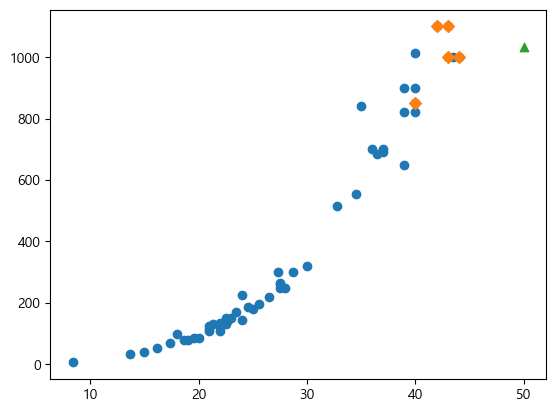

In [53]:
distance , index = knr.kneighbors([[50]])
plt.scatter(perch_length , perch_weight)
plt.scatter(x_train[index] , y_train[index] , marker = 'D')
plt.scatter(50,1033,marker = '^')
plt.show()

In [48]:
np.mean(y_train[index])

1033.3333333333333